In [1]:
import torch
from torch import nn
import mpi4py
import pandas as pd
import random 
import matplotlib.pyplot as plt
import MNISTh as mh
from MNISTh.ConvNet import ConvNet

import copy
import numpy as np

/Users/hollymandel/miniconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/hollymandel/miniconda3/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: (__ZN3c1017RegisterOperatorsD1Ev)
  Referenced from: '/Users/hollymandel/miniconda3/lib/python3.10/site-packages/torchvision/image.so'
  Expected in: '/Users/hollymandel/miniconda3/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
%%bash
mpirun -n 2 python "data_parallel.py"

/Users/hollymandel/miniconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/hollymandel/miniconda3/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: (__ZN3c1017RegisterOperatorsD1Ev)
  Referenced from: '/Users/hollymandel/miniconda3/lib/python3.10/site-packages/torchvision/image.so'
  Expected in: '/Users/hollymandel/miniconda3/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/hollymandel/miniconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/hollymandel/miniconda3/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol n

In [3]:
with open("parallel_results.csv", "r") as f:
    parallel_out = pd.read_csv(f)

In [4]:
## compare to single-machine training

print_every = 10
# seed = 0
# random.seed(seed) 
# np.random.seed(seed) 
# torch.manual_seed(seed)
lr = 1e-3
    
trainloader = mh.trainloader
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr)
    
save_loss = []
for i, (inputs, labels) in enumerate(trainloader, 0):
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if i % print_every == print_every - 1:
        save_loss.append(loss.detach().numpy().item())

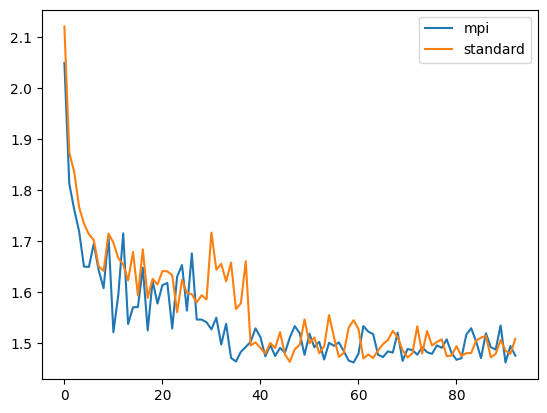

In [5]:
parallel_out["sum_loss"].plot();
plt.plot(np.asarray(save_loss))
plt.legend(["mpi","standard"])